In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Trump.csv')
df

,user_country,source,content,date
0,NaN,CQ Advocacy,Dear @kwelkernbc: Ask @realdonaldtrump &amp; @...,2020-10-22T23:59:59+00:00
1,"Queensland, Australia",Twitter for iPad,Bonus episode this week as Ollie introduces Ja...,2020-10-22T23:59:59+00:00
2,NaN,Twitter Web App,".@POTUS .@realDonaldTrump Sir, fyi: Italy Did...",2020-10-22T23:59:59+00:00
3,"Orange County, California USA",Twitter for iPad,@realDonaldTrump @realDonaldTrump #SuburbanWo...,2020-10-22T23:59:59+00:00
4,Michigan,Twitter for iPhone,@DonaldJTrumpJr @JoeBiden @realDonaldTrump 🥱🥱🥱...,2020-10-22T23:59:59+00:00
...,...,...,...,...
1995,"oakland, california",Twitter Web App,@realDonaldTrump Detroit city workers pensions?,2020-10-22T23:58:21+00:00
1996,"Cleveland, OH",Twitter Web App,@MissMyCaliCoast WTF? Prob Trump planning to i...,2020-10-22T23:58:21+00:00
1997,USA,Twitter for iPad,@Out5p0ken @chipfranklin @realDonaldTrump Oh s...,2020-10-22T23:58:20+00:00
1998,NaN,Twitter for iPhone,@chantaltweett Trump is an insane lying criminal.,2020-10-22T23:58:20+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

52471
['dear', '@kwelkernbc', ':', 'ask', '@realdonaldtrump', '&', '@joebiden', 'how', 'they', 'would', 'stop', 'the', 'brutal', 'bombardment', 'of', 'armenian', 'civilians', 'in', '#artsakh', 'by']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 148.99%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

21215
['dear', 'ask', 'would', 'stop', 'brutal', 'bombardment', 'armenian', 'civilians', 'azerbaijan', 'turkish', 'isis', 'allies', 'episode', 'week', 'ollie', 'introduces', 'james', 'fabulous', 'brilliant', 'sir']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 673),
 ('@joebiden', 159),
 ('@donaldjtrumpjr', 69),
 ('@whitehouse', 36),
 ('@youtube', 28),
 ('@nypost', 27),
 ('@gop', 21),
 ('@foxnews', 21),
 ('@60minutes', 13),
 ('@ingrahamangle', 13),
 ('@charliekirk11', 13),
 ('@kimstrassel', 12),
 ('@richlowry', 12),
 ('@projectlincoln', 12),
 ('@fbi', 11),
 ('@teamtrump', 11),
 ('@mmflint', 10),
 ('@potus', 10),
 ('@vp', 9),
 ('@breitbartnews', 9)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,CQ Advocacy,Dear @kwelkernbc: Ask @realdonaldtrump &amp; @...,2020-10-22T23:59:59+00:00,Negative
1,"Queensland, Australia",Twitter for iPad,Bonus episode this week as Ollie introduces Ja...,2020-10-22T23:59:59+00:00,Positive
2,NaN,Twitter Web App,".@POTUS .@realDonaldTrump Sir, fyi: Italy Did...",2020-10-22T23:59:59+00:00,Positive
3,"Orange County, California USA",Twitter for iPad,@realDonaldTrump @realDonaldTrump #SuburbanWo...,2020-10-22T23:59:59+00:00,Positive
4,Michigan,Twitter for iPhone,@DonaldJTrumpJr @JoeBiden @realDonaldTrump 🥱🥱🥱...,2020-10-22T23:59:59+00:00,Neutral
...,...,...,...,...,...
1995,"oakland, california",Twitter Web App,@realDonaldTrump Detroit city workers pensions?,2020-10-22T23:58:21+00:00,Neutral
1996,"Cleveland, OH",Twitter Web App,@MissMyCaliCoast WTF? Prob Trump planning to i...,2020-10-22T23:58:21+00:00,Negative
1997,USA,Twitter for iPad,@Out5p0ken @chipfranklin @realDonaldTrump Oh s...,2020-10-22T23:58:20+00:00,Negative
1998,NaN,Twitter for iPhone,@chantaltweett Trump is an insane lying criminal.,2020-10-22T23:58:20+00:00,Negative


In [11]:
df.sentiment.value_counts()

Positive    761
Neutral     698
Negative    541
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 38.05%
Percentage of neutral tweets: 34.90%
Percentage of negative tweets: 27.05%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

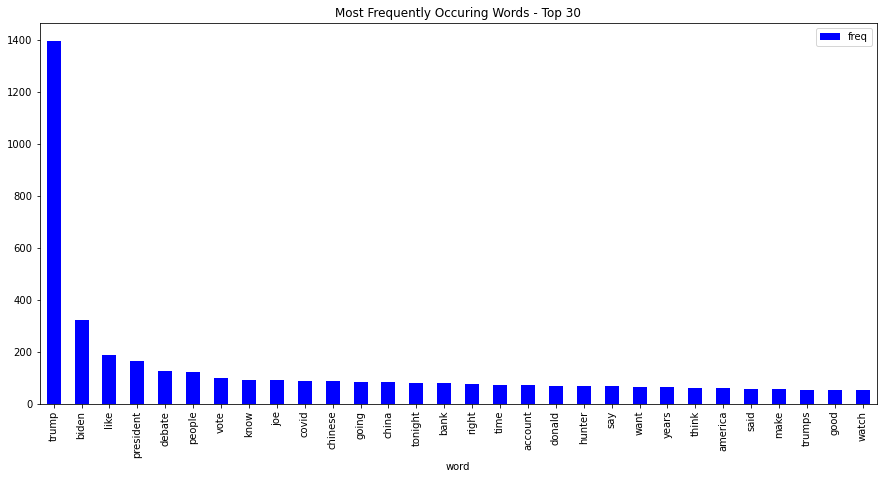

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Biden-Debate1')

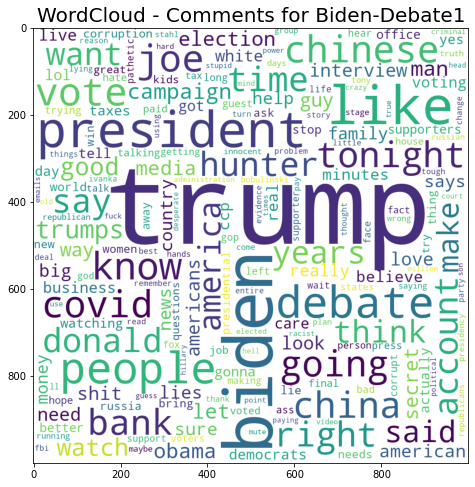

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Biden-Debate1", fontsize = 20)

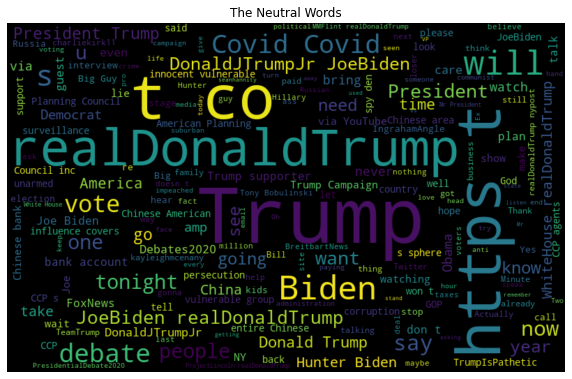

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

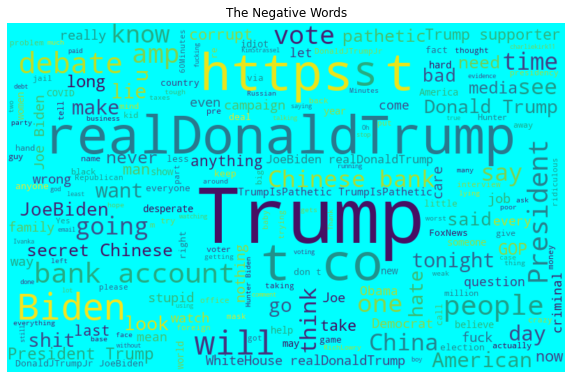

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

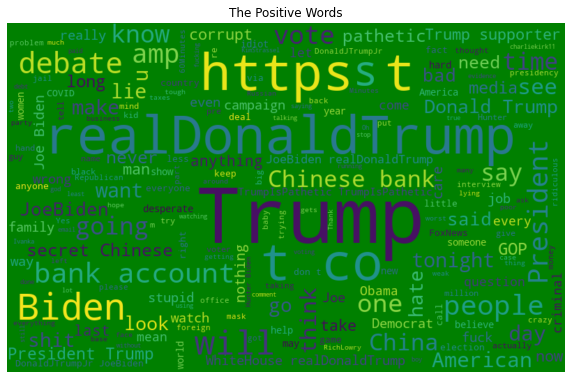

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,Dear @kwelkernbc: Ask @realdonaldtrump &amp; @...,Negative
1,Bonus episode this week as Ollie introduces Ja...,Positive
2,".@POTUS .@realDonaldTrump Sir, fyi: Italy Did...",Positive
3,@realDonaldTrump @realDonaldTrump #SuburbanWo...,Positive
4,@DonaldJTrumpJr @JoeBiden @realDonaldTrump 🥱🥱🥱...,Neutral
...,...,...
1995,@realDonaldTrump Detroit city workers pensions?,Neutral
1996,@MissMyCaliCoast WTF? Prob Trump planning to i...,Negative
1997,@Out5p0ken @chipfranklin @realDonaldTrump Oh s...,Negative
1998,@chantaltweett Trump is an insane lying criminal.,Negative


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Negative,dear ask how they would stop the brutal bombar...
1,Positive,bonus episode this week as ollie introduces ja...
2,Positive,sir fyi italy did everything fauci recommends ...
3,Positive,suburbanwomen i realize i don t speak for all ...
4,Neutral,reruns of
...,...,...
1995,Neutral,detroit city workers pensions
1996,Negative,wtf prob trump planning to interupt
1997,Negative,oh shit is trump going to the bunker on nov rd...
1998,Negative,trump is an insane lying criminal


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,bonus episode this week as ollie introduces ja...
2,Positive,sir fyi italy did everything fauci recommends ...
3,Positive,suburbanwomen i realize i don t speak for all ...
10,Positive,we have the best president ever i will pray fo...
12,Positive,i wish you trump supporters would make your mi...
...,...,...
1994,Negative,get new makeup that cheap crap you use looks p...
1996,Negative,wtf prob trump planning to interupt
1997,Negative,oh shit is trump going to the bunker on nov rd...
1998,Negative,trump is an insane lying criminal


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,bonus episode this week as ollie introduces ja...
2,1,sir fyi italy did everything fauci recommends ...
3,1,suburbanwomen i realize i don t speak for all ...
10,1,we have the best president ever i will pray fo...
12,1,i wish you trump supporters would make your mi...
...,...,...
1994,0,get new makeup that cheap crap you use looks p...
1996,0,wtf prob trump planning to interupt
1997,0,oh shit is trump going to the bunker on nov rd...
1998,0,trump is an insane lying criminal


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(976, 2)
(326, 2)


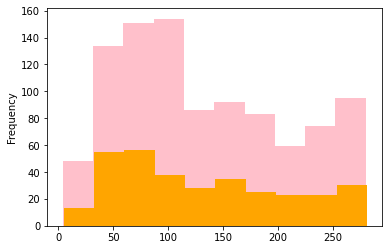

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(315010, 489060)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('debating', 0.7707939147949219),
 ('using', 0.7705232501029968),
 ('dilley', 0.7681049108505249),
 ('studies', 0.7658402323722839),
 ('happened', 0.7600259780883789),
 ('impeached', 0.7593100666999817),
 ('awesome', 0.7589395642280579),
 ('topic', 0.758742094039917),
 ('theblaze', 0.7555832862854004),
 ('secretly', 0.7548252940177917)]

In [38]:
model_w2v.wv.most_similar(negative = "trum")

[('vote', -0.3120160698890686),
 ('states', -0.338225781917572),
 ('everything', -0.34307676553726196),
 ('go', -0.3553091287612915),
 ('line', -0.365273654460907),
 ('virus', -0.38072818517684937),
 ('lose', -0.38153278827667236),
 ('enough', -0.38176870346069336),
 ('were', -0.3827323615550995),
 ('election', -0.3855920135974884)]

In [39]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [40]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(976, 500)
(976,)
(326, 500)


In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9979508196721312
Validation Accuracy : 0.5061349693251533
F1 score : 0.48888888888888893
[[ 88  43]
 [118  77]]


In [45]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9938524590163934
Validation Accuracy : 0.49079754601226994
f1 score : 0.5174418604651163
[[ 71  60]
 [106  89]]


In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9979508196721312
Validation Accuracy : 0.49079754601226994
f1 score : 0.3805970149253731
[[109  22]
 [144  51]]


In [47]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9436475409836066
Validation Accuracy : 0.5276073619631901
f1 score : 0.6188118811881188
[[ 47  84]
 [ 70 125]]


In [48]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 and he can t delete it like he could a tweet stupid is as stupid does trumpisaloser trumpisalaughingstock trumpisanationaldisgrace billboard 

First sample after preprocessing: 
 [  4  11  36  15  13  30  11 174   5 265   6  39 265 120   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [49]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [50]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [51]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6843 - accuracy: 0.5729 - val_loss: 0.6844 - val_accuracy: 0.5714
Epoch 2/20
7/7 - 1s - loss: 0.6792 - accuracy: 0.5809 - val_loss: 0.6844 - val_accuracy: 0.5714
Epoch 3/20
7/7 - 1s - loss: 0.6766 - accuracy: 0.5809 - val_loss: 0.6840 - val_accuracy: 0.5714
Epoch 4/20
7/7 - 1s - loss: 0.6714 - accuracy: 0.5809 - val_loss: 0.6827 - val_accuracy: 0.5714
Epoch 5/20
7/7 - 1s - loss: 0.6644 - accuracy: 0.5809 - val_loss: 0.6803 - val_accuracy: 0.5714
Epoch 6/20
7/7 - 1s - loss: 0.6509 - accuracy: 0.5820 - val_loss: 0.6733 - val_accuracy: 0.5714
Epoch 7/20
7/7 - 1s - loss: 0.6282 - accuracy: 0.6059 - val_loss: 0.6601 - val_accuracy: 0.5918
Epoch 8/20
7/7 - 1s - loss: 0.5892 - accuracy: 0.6868 - val_loss: 0.6318 - val_accuracy: 0.5816
Epoch 9/20
7/7 - 1s - loss: 0.5307 - accuracy: 0.7585 - val_loss: 0.6086 - val_accuracy: 0.6122
Epoch 10/20
7/7 - 1s - loss: 0.4549 - accuracy: 0.8200 - val_loss: 0.5905 - val_accuracy: 0.6735
Epoch 11/20
7/7 - 1s - loss: 0.3712 - a

In [52]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,0,dear ask how they would stop the brutal bombar...
1,1,bonus episode this week as ollie introduces ja...
2,1,sir fyi italy did everything fauci recommends ...
3,1,suburbanwomen i realize i don t speak for all ...
4,-1,reruns of
...,...,...
1995,-1,detroit city workers pensions
1996,0,wtf prob trump planning to interupt
1997,0,oh shit is trump going to the bunker on nov rd...
1998,0,trump is an insane lying criminal


In [53]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [54]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [55]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [56]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9953333333333333
Validation Accuracy : 0.434
F1 score : [0.54005935 0.26415094 0.45728643]
[[91 26 48]
 [41 35 78]
 [40 50 91]]


In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8953333333333333
Validation Accuracy : 0.428
f1 score : [0.51829268 0.41642229 0.35045317]
[[85 34 46]
 [37 71 46]
 [41 82 58]]


In [58]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9953333333333333
Validation Accuracy : 0.414
f1 score : [0.45229682 0.31921824 0.45853659]
[[64 44 57]
 [27 49 78]
 [27 60 94]]


In [59]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8506666666666667
Validation Accuracy : 0.49
f1 score : [0.62631579 0.10695187 0.53579677]
[[119  10  36]
 [ 44  10 100]
 [ 52  13 116]]


In [60]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['trump is doing worse than it seems but reporters are afraid to say so smartnews a single lie destroys a whole reputation of integrity baltasar gracian not with republicans they liars like the grifter in chief', 'that is exactly what i have been saying this whole time why', 'if trump is so bad then twhy keep goting forrrrr him', 'wonder how late the debate will start tonight because trump will show up late and refuse to be tested again', 'when potus is asked about climate change he should say if you believe in it the best to fight it is bring jobs from china to americas clean manufacturing processes', 'dan i m in uk but thinking of america and hope the people see sense and vote trump out also praying that we can get rid of boris too', 'if this involved trump or one of his kids this is all you would be talking about', 'you mean that another donald trump supporter lied again oh my gooodddd', 'good luck tonight goodness shall prevail', 'i admire senat

In [62]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [63]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [64]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4423 - accuracy: 0.2704 - val_loss: 0.0917 - val_accuracy: 0.2667
Epoch 2/20
11/11 - 2s - loss: 0.1984 - accuracy: 0.2570 - val_loss: -1.8313e-01 - val_accuracy: 0.2667
Epoch 3/20
11/11 - 2s - loss: 0.1764 - accuracy: 0.2570 - val_loss: -1.3470e-01 - val_accuracy: 0.2667
Epoch 4/20
11/11 - 2s - loss: 0.1850 - accuracy: 0.2570 - val_loss: 0.0359 - val_accuracy: 0.2667
Epoch 5/20
11/11 - 2s - loss: 0.1201 - accuracy: 0.2570 - val_loss: -1.1144e-01 - val_accuracy: 0.2667
Epoch 6/20
11/11 - 2s - loss: -2.2750e-02 - accuracy: 0.2570 - val_loss: -1.3071e-01 - val_accuracy: 0.2667
Epoch 7/20
11/11 - 2s - loss: -4.0798e-01 - accuracy: 0.2570 - val_loss: -5.7299e-01 - val_accuracy: 0.2667
Epoch 8/20
11/11 - 2s - loss: -1.4234e+00 - accuracy: 0.2615 - val_loss: -1.6191e+00 - val_accuracy: 0.2800
Epoch 9/20
11/11 - 2s - loss: -3.9925e+00 - accuracy: 0.2793 - val_loss: -4.2222e+00 - val_accuracy: 0.2800
Epoch 10/20
11/11 - 2s - loss: -9.4940e+00 - accuracy: 0.3215 -